out: N=1000, transient=1000, eval=1000, gran=64
out2: N=1000, transient=100, eval=100, gran=64
out3: N=1000, transient=50, eval=50, gran=64
out4: N=1000, transient=0, eval=1, gran=64
out5: N=2000, transient=0, eval=1, gran=64

out7: N=1000, transient=10, eval=10, gran=64 //// payoff since beginning
out8: N=1000, transient=100 , eval=10, gran=64 
 
out9: N=1000, transient=1000 , eval=10, gran=64 // BARABASI
out10: N=1000, transient=10 , eval=10, gran=64 // COMPLETE



In [52]:
import numpy as np
import os

os.chdir("/Users/mos/Documents/ULB/MA3.tmp/INFO-F409/Exam/LDProject/out/out10")
GRANULARITY = 64

data = np.zeros((GRANULARITY,GRANULARITY))
for i in range(GRANULARITY): # Over S's
    with open("out_S_{}.txt".format(i)) as file:
        x = 0
        for line in file:
            data[i,x] = line
            x += 1

In [55]:
np.max(np.max(data))

574.861

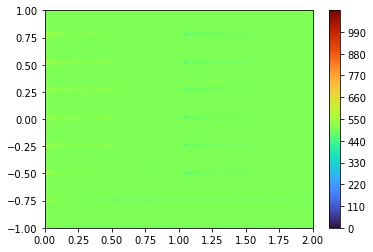

In [54]:
import matplotlib.pyplot as plt

S = np.linspace(-1,1,GRANULARITY)
T = np.linspace(0,2,GRANULARITY)

X,Y = np.meshgrid(T,S)


clev = np.arange(0,1100,1)
plt.contourf(X,Y,data, clev, cmap='turbo')
plt.colorbar()

In [ ]:
for line in data[51]:
    print(line)

In [43]:
from pylab import *
from numpy import *
from matplotlib.colors import LinearSegmentedColormap

class nlcmap(LinearSegmentedColormap):
    """A nonlinear colormap"""
    
    name = 'nlcmap'
    
    def __init__(self, cmap, levels):
        self.cmap = cmap
        # @MRR: Need to add N for backend
        self.N = cmap.N
        self.monochrome = self.cmap.monochrome
        self.levels = asarray(levels, dtype='float64')
        self._x = self.levels / self.levels.max()
        self._y = linspace(0.0, 1.0, len(self.levels))
    
    #@MRR Need to add **kw for 'bytes'
    def __call__(self, xi, alpha=1.0, **kw):
        """docstring for fname"""
        # @MRR: Appears broken? 
        # It appears something's wrong with the
        # dimensionality of a calculation intermediate
        #yi = stineman_interp(xi, self._x, self._y)
        yi = interp(xi, self._x, self._y)
        return self.cmap(yi, alpha)

    
levels = [0,200,400,500,600,800,900]
cmap_lin = cm.turbo
cmap_nonlin = nlcmap(cmap_lin, levels)